## Loading the dataset 

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
#to draw the graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus 

In [17]:
df = pd.read_csv("divorce.csv", sep = ';')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [18]:
X = df
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [19]:
X = X.drop(["Class"], axis = 1)
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [20]:
y = df["Class"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

## Splitting the dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Selecting K best features

In [22]:
X_train_new = SelectKBest(score_func = f_classif, k=9).fit_transform(x_train, y_train)
X_train_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 4, 4, ..., 4, 3, 4],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 3, 3, ..., 4, 4, 4]], dtype=int64)

In [23]:
x_train = X_train_new

In [24]:
X_test_new = SelectKBest(score_func = f_classif, k=9).fit_transform(x_test, y_test)
X_test_new

array([[1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [4, 3, 4, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 4, 4, 4, 3, 3, 3],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [2, 4, 2, 3, 1, 3, 4, 4, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 2, 2, 1, 1, 2, 2, 2, 3],
       [3, 2, 2, 2, 2, 0, 4, 4, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 2, 4, 3, 3, 3, 4, 4, 4],
       [3, 4, 3, 3, 3, 3, 4, 4, 4],
       [3, 2, 3, 2, 2, 2, 4, 4, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 3, 3, 2, 2, 2, 4, 4, 4],
       [3, 3, 3, 2, 2, 2, 4, 4, 4],
       [2, 1, 1, 1, 1, 0, 0, 0, 0],
       [2, 1, 1, 1, 1, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 2, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [3, 3, 3, 3, 3, 3, 4, 4, 3],
       [3, 2, 3, 3, 3, 3, 3, 3, 3],
       [0, 0, 0, 0, 0, 0, 0,

In [25]:
x_test = X_test_new

## Logistic Regression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_lr))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_lr, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_lr, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_lr, average='weighted'))

Accuracy Score: 0.9705882352941176
Precision, Recall and F-Score:
(0.9705882352941176, 0.9722222222222222, 0.9705627705627706, None)
(0.9705882352941176, 0.9705882352941176, 0.9705882352941176, None)
(0.9723183391003462, 0.9705882352941176, 0.9706137000254645, None)


In [28]:
y_pred_lr

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

## KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_knn, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_knn, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_knn, average='weighted'))

Accuracy Score: 0.9705882352941176
Precision, Recall and F-Score:
(0.9705882352941176, 0.9722222222222222, 0.9705627705627706, None)
(0.9705882352941176, 0.9705882352941176, 0.9705882352941176, None)
(0.9723183391003462, 0.9705882352941176, 0.9706137000254645, None)


In [31]:
y_pred_knn

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

## Decision Tree

In [32]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

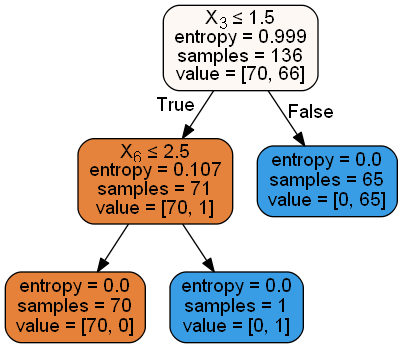

In [33]:
from graphviz import *
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 500, height = 500)

In [34]:
y_pred_tree = tree.predict(x_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_tree, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_tree, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_tree, average='weighted'))

Accuracy Score: 0.9411764705882353
Precision, Recall and F-Score:
(0.9444444444444444, 0.9444444444444444, 0.9411764705882353, None)
(0.9411764705882353, 0.9411764705882353, 0.9411764705882353, None)
(0.9477124183006536, 0.9411764705882353, 0.9411764705882353, None)


In [35]:
y_pred_tree

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

## Gradient Descent

In [36]:
SGDClf = linear_model.SGDClassifier(max_iter = 10000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(x_train, y_train)
y_pred_GD = SGDClf.predict(x_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_GD))
print("Precision, Recall and F-Score:")
print(precision_recall_fscore_support(y_test, y_pred_GD, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred_GD, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred_GD, average='weighted'))

Accuracy Score: 1.0
Precision, Recall and F-Score:
(1.0, 1.0, 1.0, None)
(1.0, 1.0, 1.0, None)
(1.0, 1.0, 1.0, None)
